In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=4ea13ff70d21fd779bece678994d383b1f34edbf49f596d41ec2e3a0f8ec2e0f
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
from sklearn.model_selection import train_test_split

In [ ]:
ticker_symbol = "SPY"
#YYYY-MM-DD
end_date = "2023-09-14"
start_date = "2013-01-01"

data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1d")

data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,145.110001,146.149994,144.729996,146.059998,119.976463,192059000
2013-01-03,145.990005,146.369995,145.339996,145.729996,119.705414,144761800
2013-01-04,145.970001,146.610001,145.669998,146.369995,120.231102,116817700
2013-01-07,145.850006,146.110001,145.429993,145.970001,119.902550,110002500
2013-01-08,145.710007,145.910004,144.979996,145.550003,119.557549,121265100
...,...,...,...,...,...,...
2023-09-07,443.109985,445.549988,442.750000,444.850006,443.286377,70355400
2023-09-08,444.899994,447.109985,444.529999,445.519989,443.954010,61659700
2023-09-11,448.239990,448.769989,446.470001,448.450012,446.873749,60180100


In [ ]:
#adding technical indicators
ta.rsi(data.Close, length=15)



Date
2013-01-02          NaN
2013-01-03          NaN
2013-01-04          NaN
2013-01-07          NaN
2013-01-08          NaN
                ...    
2023-09-07    49.184559
2023-09-08    50.132910
2023-09-11    54.142958
2023-09-12    50.490569
2023-09-13    51.235613
Name: RSI_15, Length: 2693, dtype: float64

In [ ]:
#adding technical indicators
data["RSI"] = ta.rsi(data.Close, length=15)
#Exponential moving average with different time span
data["EMAF"] = ta.ema(data.Close, length=20)
data["EMAM"] = ta.ema(data.Close, length=100)
data["EMAS"] = ta.ema(data.Close, length=150)

#next day target price
data["Target"] = (data['Adj Close']-data["Open"]).shift(-1)
data["TargetClass"] = [1 if data["Target"][i] > 0 else 0 for i in range(len(data))]
data["NextCloseTarget"] = data["Adj Close"].shift(-1)

In [ ]:
#data cleaning
data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [ ]:
data

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,NextCloseTarget
0,170.369995,170.740005,169.350006,141.277100,61.600285,168.336880,161.798659,158.296934,-28.370651,0,140.819351
1,169.190002,169.429993,168.550003,140.819351,58.402063,168.417177,161.944824,158.441080,-28.644577,0,141.335419
2,169.979996,170.179993,168.929993,141.335419,60.856664,168.548874,162.100372,158.591529,-28.652451,0,140.927551
3,169.580002,170.100006,168.720001,140.927551,57.960606,168.621362,162.243137,158.733496,-27.698898,0,140.761108
4,168.460007,169.309998,168.380005,140.761108,56.779001,168.667899,162.379115,158.870933,-28.232727,0,141.177277
...,...,...,...,...,...,...,...,...,...,...,...
2538,448.399994,448.510010,443.809998,446.220001,51.036945,445.880133,434.352883,427.595794,1.740021,1,444.850006
2539,443.109985,445.549988,442.750000,444.850006,49.184559,445.782026,434.560747,427.824326,0.619995,1,445.519989
2540,444.899994,447.109985,444.529999,445.519989,50.132910,445.757070,434.777762,428.058706,0.210022,1,448.450012
2541,448.239990,448.769989,446.470001,448.450012,54.142958,446.013541,435.048500,428.328789,-0.960022,0,445.989990


In [ ]:
#scale input data
from sklearn.preprocessing import MinMaxScaler
#scale data between 0 and 1
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(data)
scaled_data

array([[0.02250285, 0.01981045, 0.02012716, ..., 0.10921666, 0.        ,
        0.01472806],
       [0.01876822, 0.01565814, 0.01757132, ..., 0.10322573, 0.        ,
        0.016289  ],
       [0.02126852, 0.0180354 , 0.01878531, ..., 0.10305353, 0.        ,
        0.01505533],
       ...,
       [0.89137863, 0.89581278, 0.8992684 , ..., 0.734294  , 1.        ,
        0.94521299],
       [0.90194958, 0.90107445, 0.90546629, ..., 0.7087044 , 0.        ,
        0.93777221],
       [0.89786686, 0.90031376, 0.90201596, ..., 0.73604336, 1.        ,
        0.9393451 ]])

In [ ]:
# input features
X = []
backcandles = 30
for j in range(8):
  X.append([])
  for i in range(backcandles, scaled_data.shape[0]):
    X[j].append(scaled_data[i-backcandles:i,j])

X=np.moveaxis(X, [0], [2])
#yi -> select the desired column
X = np.array(X)


### Predicting next day closing price

In [ ]:
yi_nct = np.array(scaled_data[backcandles:,-1])
y_nct=np.reshape(yi_nct,(len(yi_nct),1))

In [ ]:
X_train_nct, X_test_nct, y_train_nct, y_test_nct = train_test_split(X, y_nct, test_size=0.2,shuffle = False)
print(X_train_nct.shape, X_test_nct.shape, y_train_nct.shape, y_test_nct.shape)

(2010, 30, 8) (503, 30, 8) (2010, 1) (503, 1)


### Predicting stock direction

In [ ]:
yi_sd = np.array(scaled_data[backcandles:,-2])
y_sd = np.reshape(yi_sd,(len(yi_sd),1))

In [ ]:
X_train_sd, X_test_sd, y_train_sd, y_test_sd = train_test_split(X, y_sd, test_size=0.2,shuffle = False)
print(X_train_sd.shape, X_test_sd.shape, y_train_sd.shape, y_test_sd.shape)

(2010, 30, 8) (503, 30, 8) (2010, 1) (503, 1)


### Predicting price changes

In [ ]:
yi_pc = np.array(scaled_data[backcandles:,-3])
y_pc = np.reshape(yi_pc,(len(yi_pc),1))

In [ ]:
X_train_pc, X_test_pc, y_train_pc, y_test_pc = train_test_split(X, y_pc, test_size=0.2,shuffle = False)
print(X_train_pc.shape, X_test_pc.shape, y_train_pc.shape, y_test_pc.shape)

(2010, 30, 8) (503, 30, 8) (2010, 1) (503, 1)


### LSTM Architecture

In [ ]:
from keras.layers import Input, LSTM, Dense, Activation
from keras.models import Model
from keras import optimizers

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 30, 8)]           0         
                                                                 
 first_layer (LSTM)          (None, 150)               95400     
                                                                 
 dense_layer (Dense)         (None, 1)                 151       
                                                                 
 output (Activation)         (None, 1)                 0         
                                                                 
Total params: 95551 (373.25 KB)
Trainable params: 95551 (373.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Performance Matrix

In [ ]:
import math
from sklearn.metrics import mean_squared_error
def get_accuracy(y_pred,y_test):
    #Constructing predicted movement
    movement_pred = pd.DataFrame(y_pred) - pd.DataFrame(y_pred).shift()
    movement_pred.dropna(inplace = True)
    for i in range(len(movement_pred)):
        if movement_pred.iat[i,0] > 0:
            movement_pred.iat[i,0] = 1
        else:
            movement_pred.iat[i,0] = 0
    #Constructing groundtruth movement
    movement_gt = pd.DataFrame(y_test) - pd.DataFrame(y_test).shift()
    movement_gt.dropna(inplace = True)
    for i in range(len(movement_gt)):
        if movement_gt.iat[i,0] > 0:
            movement_gt.iat[i,0] = 1
        else:
            movement_gt.iat[i,0] = 0
    #Make a comparison then calculate accuracy
    movement = (movement_pred==movement_gt)
    accuracy = np.unique(movement, return_counts=True)[1][1] / len(movement)

    #Calculating RMSE and MAPE
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    z = pd.DataFrame(np.abs((y_test - y_pred)/y_test)).replace(np.inf, np.nan)
    MAPE = z.mean() * 100

    RMSE = math.sqrt(mean_squared_error(y_pred,y_test))

    return accuracy,MAPE,RMSE

In [ ]:
model_nct = model
model_nct.fit(x=X_train_nct, y=y_train_nct, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
121/121 [==============================] - 5s 45ms/step - loss: 1.3580e-04 - val_loss: 0.0010
Epoch 2/30
121/121 [==============================] - 4s 32ms/step - loss: 1.4656e-04 - val_loss: 4.6294e-04
Epoch 3/30
121/121 [==============================] - 4s 33ms/step - loss: 1.5032e-04 - val_loss: 2.5258e-04
Epoch 4/30
121/121 [==============================] - 6s 48ms/step - loss: 1.3354e-04 - val_loss: 7.4268e-04
Epoch 5/30
121/121 [==============================] - 6s 54ms/step - loss: 1.4758e-04 - val_loss: 2.7840e-04
Epoch 6/30
121/121 [==============================] - 7s 59ms/step - loss: 1.4543e-04 - val_loss: 3.1824e-04
Epoch 7/30
121/121 [==============================] - 4s 33ms/step - loss: 1.6235e-04 - val_loss: 6.6188e-04
Epoch 8/30
121/121 [==============================] - 4s 33ms/step - loss: 1.4405e-04 - val_loss: 2.7820e-04
Epoch 9/30
121/121 [==============================] - 9s 75ms/step - loss: 1.3720e-04 - val_loss: 2.8452e-04
Epoch 10/30
121/121 [==

In [ ]:
y_pred_nct = model.predict(X_test_nct)
RMSE1,MAPE1,acc1 = get_accuracy(y_pred_nct,y_test_nct)

16/16 [==============================] - 1s 14ms/step


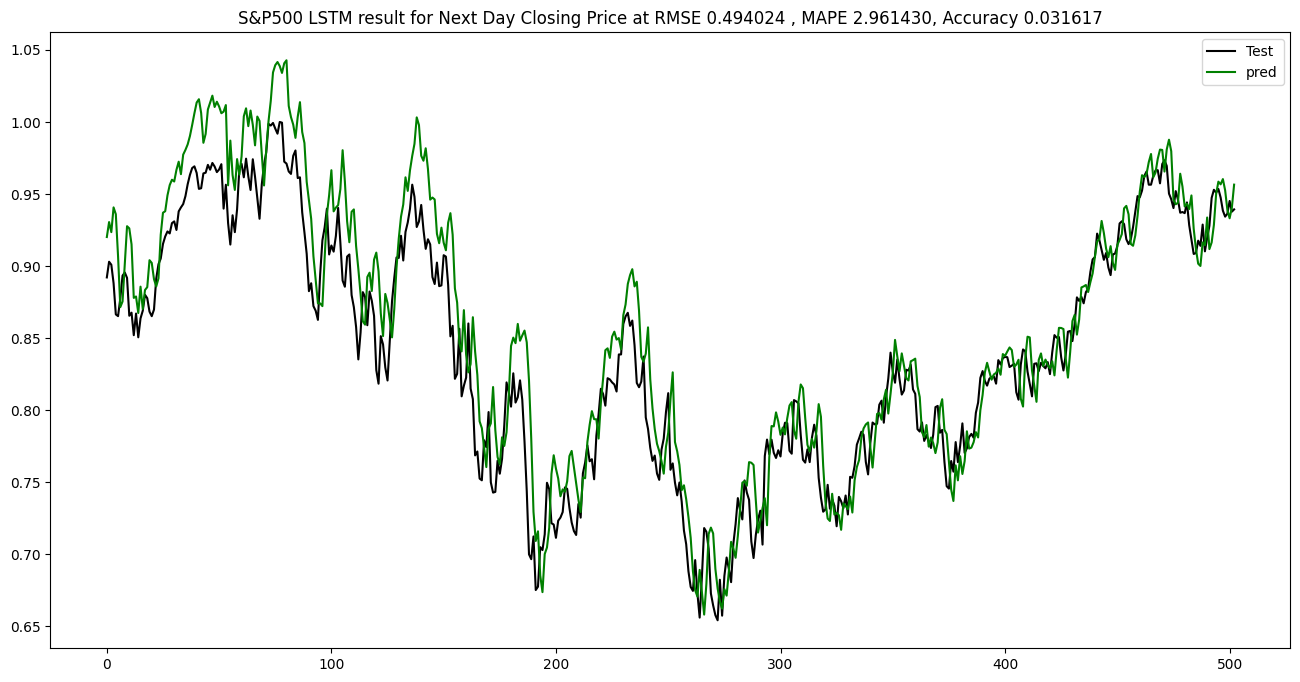

In [ ]:
plt.figure(figsize=(16,8))
plt.title('S&P500 LSTM result for Next Day Closing Price at RMSE %2f , MAPE %2f, Accuracy %2f' %(RMSE1,MAPE1,acc1))
plt.plot(y_test_nct, color = 'black', label = 'Test')
plt.plot(y_pred_nct, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:
model_sd = model
model_sd.fit(x=X_train_sd, y=y_train_sd, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
121/121 [==============================] - 7s 58ms/step - loss: 0.0017 - val_loss: 3.5253e-05
Epoch 2/30
121/121 [==============================] - 7s 54ms/step - loss: 5.5131e-06 - val_loss: 1.1845e-05
Epoch 3/30
121/121 [==============================] - 4s 31ms/step - loss: 3.9821e-06 - val_loss: 3.1260e-05
Epoch 4/30
121/121 [==============================] - 5s 41ms/step - loss: 3.0559e-06 - val_loss: 3.1079e-05
Epoch 5/30
121/121 [==============================] - 5s 42ms/step - loss: 2.8776e-06 - val_loss: 6.2406e-06
Epoch 6/30
121/121 [==============================] - 4s 33ms/step - loss: 2.3384e-06 - val_loss: 2.3858e-05
Epoch 7/30
121/121 [==============================] - 5s 44ms/step - loss: 2.0696e-06 - val_loss: 1.3353e-05
Epoch 8/30
121/121 [==============================] - 4s 32ms/step - loss: 1.8647e-06 - val_loss: 6.0387e-06
Epoch 9/30
121/121 [==============================] - 4s 32ms/step - loss: 1.6546e-06 - val_loss: 1.0517e-05
Epoch 10/30
121/121 [==

In [ ]:
y_pred_sd = model.predict(X_test_sd)
RMSE1,MAPE1,acc1 = get_accuracy(y_pred_sd,y_test_sd)

16/16 [==============================] - 0s 15ms/step


<ipython-input-51-cd503399e2a3>:27: RuntimeWarning: divide by zero encountered in divide
  z = pd.DataFrame(np.abs((y_test - y_pred)/y_test)).replace(np.inf, np.nan)


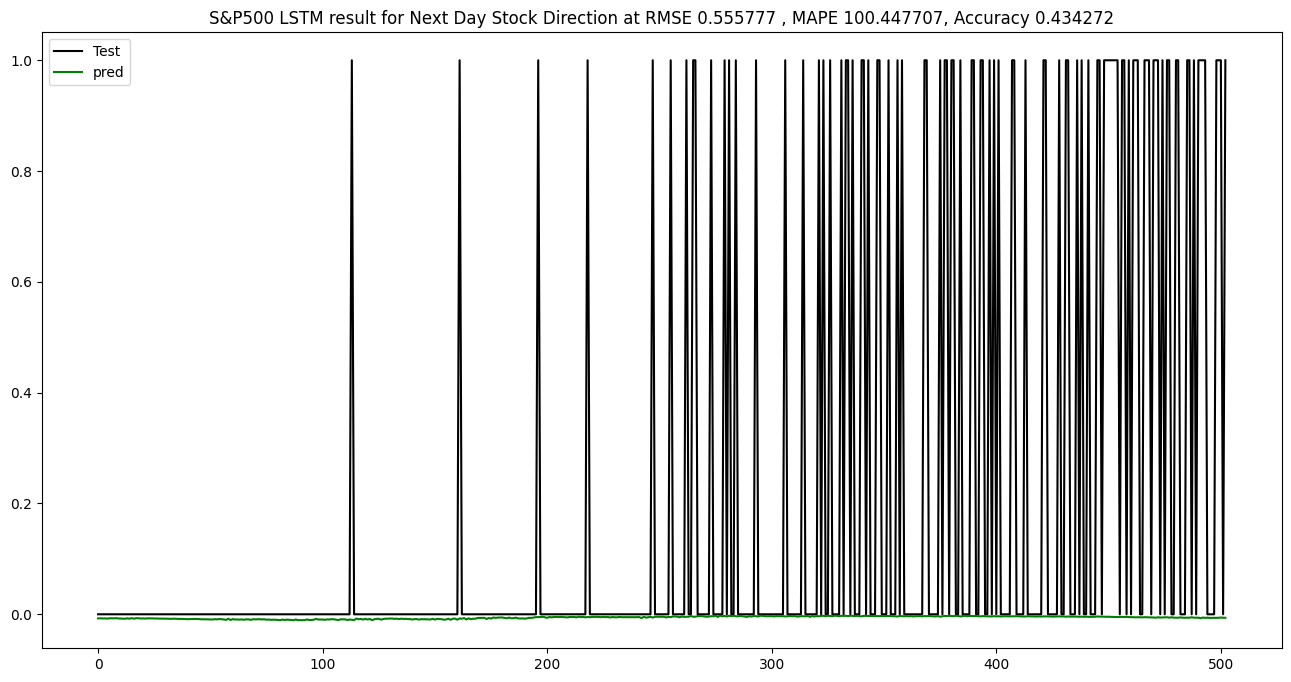

In [ ]:
plt.figure(figsize=(16,8))
plt.title('S&P500 LSTM result for Next Day Stock Direction at RMSE %2f , MAPE %2f, Accuracy %2f' %(RMSE1,MAPE1,acc1))
plt.plot(y_test_sd, color = 'black', label = 'Test')
plt.plot(y_pred_sd, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:
model_pc = model
model_pc.fit(x=X_train_pc, y=y_train_pc, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
121/121 [==============================] - 4s 33ms/step - loss: 0.0060 - val_loss: 0.0140
Epoch 2/30
121/121 [==============================] - 5s 45ms/step - loss: 0.0038 - val_loss: 0.0166
Epoch 3/30
121/121 [==============================] - 4s 32ms/step - loss: 0.0038 - val_loss: 0.0094
Epoch 4/30
121/121 [==============================] - 4s 33ms/step - loss: 0.0037 - val_loss: 0.0110
Epoch 5/30
121/121 [==============================] - 6s 46ms/step - loss: 0.0036 - val_loss: 0.0175
Epoch 6/30
121/121 [==============================] - 4s 33ms/step - loss: 0.0035 - val_loss: 0.0224
Epoch 7/30
121/121 [==============================] - 4s 33ms/step - loss: 0.0034 - val_loss: 0.0203
Epoch 8/30
121/121 [==============================] - 6s 46ms/step - loss: 0.0032 - val_loss: 0.0187
Epoch 9/30
121/121 [==============================] - 4s 33ms/step - loss: 0.0033 - val_loss: 0.0267
Epoch 10/30
121/121 [==============================] - 4s 33ms/step - loss: 0.0034 - val_lo

In [ ]:
y_pred_pc = model.predict(X_test_pc)
RMSE1,MAPE1,acc1 = get_accuracy(y_pred_pc,y_test_pc)

16/16 [==============================] - 0s 14ms/step


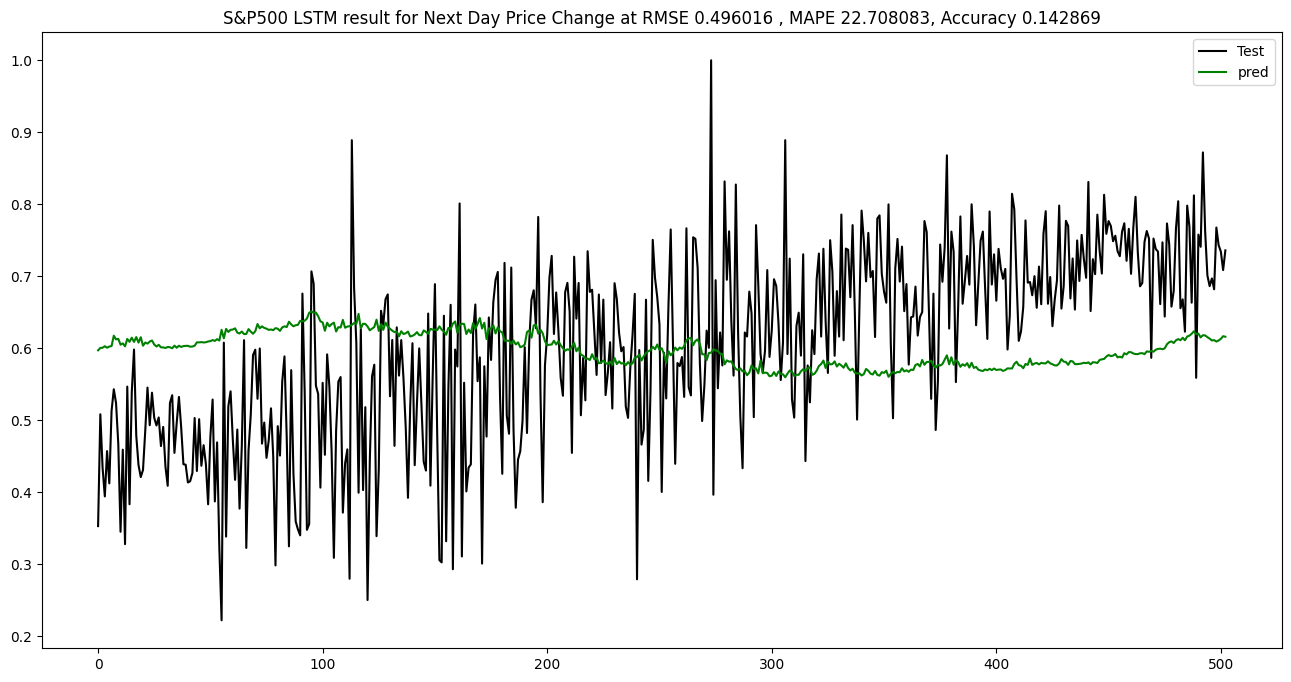

In [ ]:
plt.figure(figsize=(16,8))
plt.title('S&P500 LSTM result for Next Day Price Change at RMSE %2f , MAPE %2f, Accuracy %2f' %(RMSE1,MAPE1,acc1))
plt.plot(y_test_pc, color = 'black', label = 'Test')
plt.plot(y_pred_pc, color = 'green', label = 'pred')
plt.legend()
plt.show()